In [5]:
import numpy as np

import matplotlib.pyplot as plt



In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [9]:
import itertools
import warnings
warnings.filterwarnings("ignore")


In [10]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
cups     = pd.read_csv(r"WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


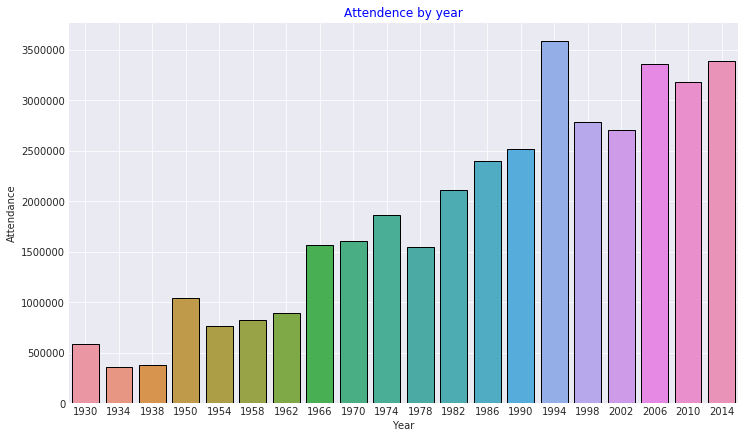

In [11]:
matches.isnull().sum()
sns.set_style("darkgrid")

matches = matches.drop_duplicates(subset="MatchID",keep="first")

matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="black")
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

In [12]:
display(matches.head(3))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


keepcol=['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendence','MatchID','Home Team Initials',Away Team Initials']

In [13]:
new_matches=pd.read_csv("WorldCupMatches.csv", usecols= ['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendance','MatchID','Home Team Initials','Away Team Initials'])


In [14]:
display(new_matches.head(3))

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,1093.0,YUG,BRA


In [15]:
display(cups.head(3))


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


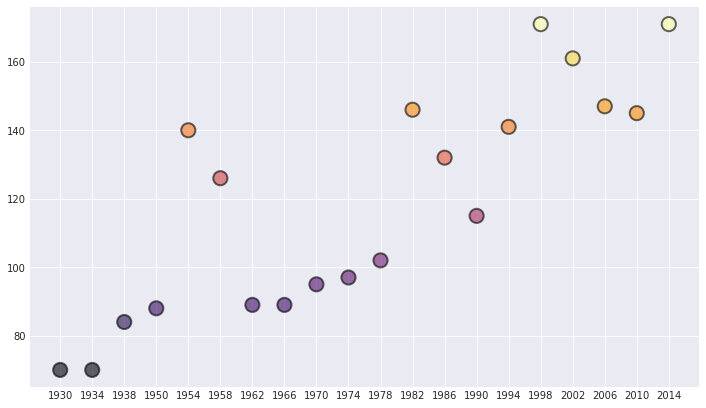

In [16]:
plt.figure(figsize=(12,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=200,alpha=0.6,
            linewidth=2,edgecolor="k",)

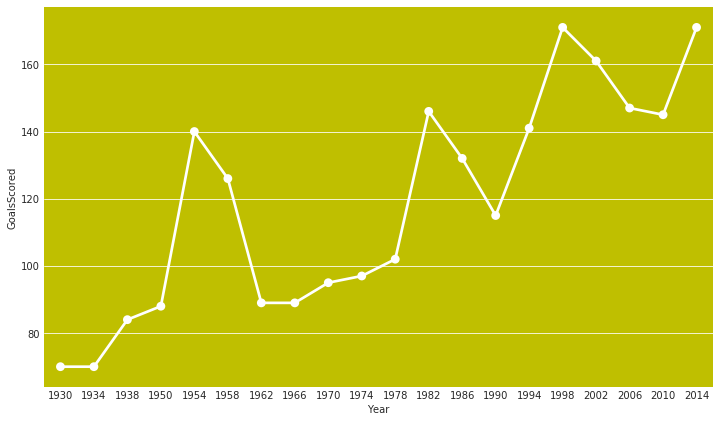

In [18]:
plt.figure(figsize=(12,7))
ax = sns.pointplot(cups["Year"],cups["GoalsScored"],color="w")
ax.set_facecolor("y")

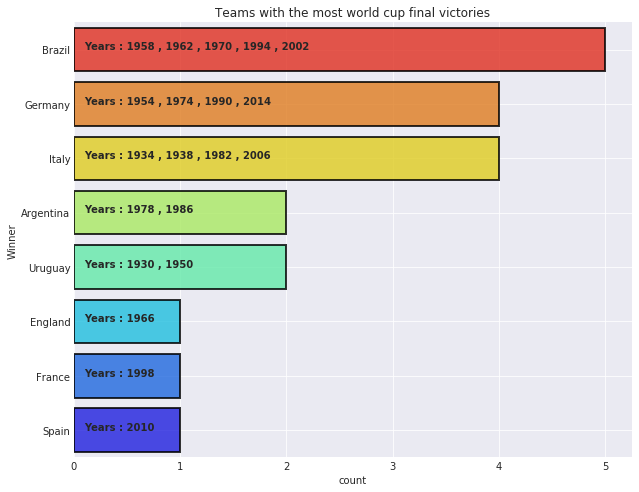

In [20]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

In [22]:
display(cups.head(3))

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Year1
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1930
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,1934
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,1938


In [29]:
players= pd.read_csv("WorldCupPlayers.csv") 
display(players.head(10))

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [31]:
new_players=pd.read_csv("WorldCupPlayers.csv", usecols= ['Team Initials','Coach Name','Player Name','Position'])
display(new_players.head(10))

,Team Initials,Coach Name,Player Name,Position
0,FRA,CAUDRON Raoul (FRA),Alex THEPOT,GK
1,MEX,LUQUE Juan (MEX),Oscar BONFIGLIO,GK
2,FRA,CAUDRON Raoul (FRA),Marcel LANGILLER,NaN
3,MEX,LUQUE Juan (MEX),Juan CARRENO,NaN
4,FRA,CAUDRON Raoul (FRA),Ernest LIBERATI,NaN
5,MEX,LUQUE Juan (MEX),Rafael GARZA,C
6,FRA,CAUDRON Raoul (FRA),Andre MASCHINOT,NaN
7,MEX,LUQUE Juan (MEX),Hilario LOPEZ,NaN
8,FRA,CAUDRON Raoul (FRA),Etienne MATTLER,NaN
9,MEX,LUQUE Juan (MEX),Dionisio MEJIA,NaN
